In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
#Cargar la imagen
image_path = '/content/drive/MyDrive/Visión por computadora/Tareas/Clase_4/cat.jpg'
img = cv2.imread(image_path)

Cambiar el color de fondo de la imagen

In [ ]:
#Cambiar el color de fondo a verde
background_color = (0, 255, 0)  # Verde
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(img, mask, (0,0), background_color, (30,30,30), (30,30,30), cv2.FLOODFILL_FIXED_RANGE)

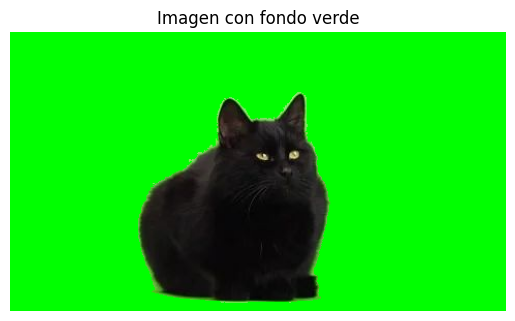

In [5]:
#Visualizar la imagen con el nuevo fondo verde
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen con fondo verde')
plt.axis('off')
plt.show()

In [ ]:
#Cambiar el color de fondo a amarillo
background_color = (0, 255, 255)  # Amarillo
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(img, mask, (0,0), background_color, (30,30,30), (30,30,30), cv2.FLOODFILL_FIXED_RANGE)

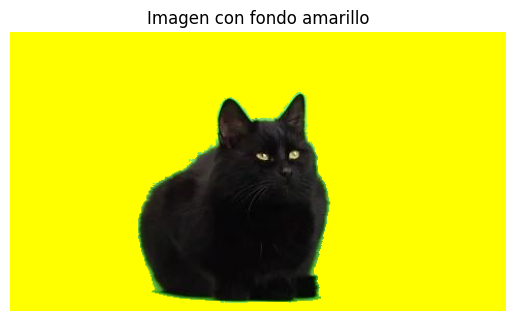

In [7]:
#Visualizar la imagen con el nuevo fondo amarillo
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen con fondo amarillo')
plt.axis('off')
plt.show()

Brillo y Contraste

In [8]:
imagen_gato_path = '/content/drive/MyDrive/Visión por computadora/Tareas/Clase_4/cat.jpg'
imagen_gato = cv2.imread(imagen_gato_path)

In [9]:
def ajustar_brillo_contraste(imagen, brillo=0, contraste=1.0):
    #Ajustar el brillo
    imagen_brillo = cv2.convertScaleAbs(imagen, alpha=contraste, beta=brillo)
    return imagen_brillo

In [10]:
#Ejemplo de ajuste de brillo y contraste
imagen_brillo_contraste = ajustar_brillo_contraste(imagen_gato, brillo=50, contraste=1.5)

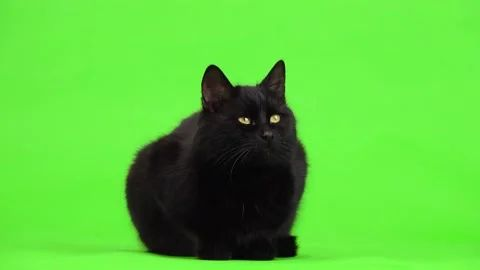

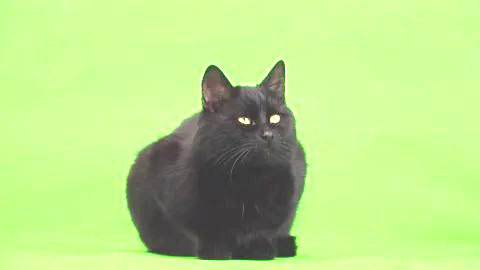

In [11]:
#Mostrar la imagen original y la imagen con brillo y contraste ajustados
cv2_imshow(imagen_gato)
cv2_imshow(imagen_brillo_contraste)

Image matting

In [12]:
#Ruta de salida para la imagen PNG
ruta_imagen_png = '/content/drive/MyDrive/Visión por computadora/Tareas/Clase_4/cat.png'

#Guardar la imagen en formato PNG con OpenCV
cv2.imwrite(ruta_imagen_png, img)

True

In [13]:
#Función para realizar image matting con GrabCut
def image_matting_grabcut(imagen):
    #Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    #Crear una máscara inicial
    mascara = np.zeros(imagen.shape[:2], np.uint8)

    #Definir el rectángulo de interés (ROI)
    rect = (50, 50, imagen.shape[1] - 100, imagen.shape[0] - 50)

    #Inicializar el modelo GrabCut con el rectángulo de interés y la máscara
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    #Aplicar GrabCut
    cv2.grabCut(imagen, mascara, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    #Crear una máscara binaria donde los píxeles de primer plano son 1 y el resto son 0
    mascara_final = np.where((mascara == 2) | (mascara == 0), 0, 1).astype('uint8')

    #Aplicar la máscara a la imagen original
    imagen_matte = imagen * mascara_final[:, :, np.newaxis]

    return imagen_matte

In [14]:
#Leer la imagen
imagen_png = cv2.imread(ruta_imagen_png)

In [15]:
#Aplicar image matting con GrabCut
imagen_matting = image_matting_grabcut(imagen_png)

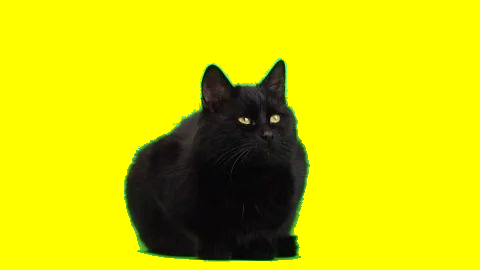

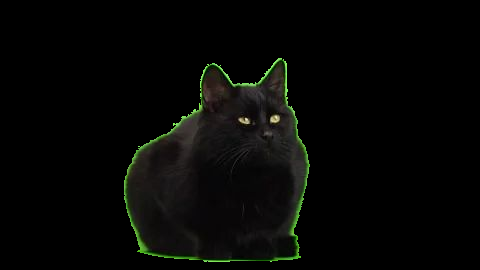

In [16]:
#Mostrar la imagen original y la imagen con image matting
cv2_imshow(imagen_png)
cv2_imshow(imagen_matting)

Operador Sobel

In [17]:
def operador_sobel(imagen):
    #Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    #Calcular el gradiente en las direcciones x e y usando Sobel
    gradiente_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
    #Calcular la magnitud del gradiente
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    return magnitud_gradiente

In [23]:
#Operador Sobel
imagen_sobel = operador_sobel(img)

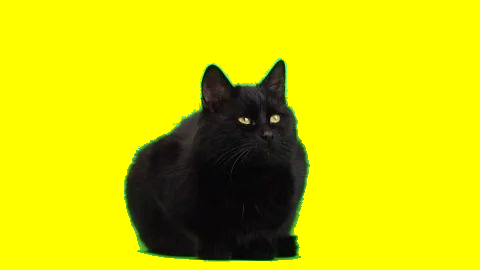

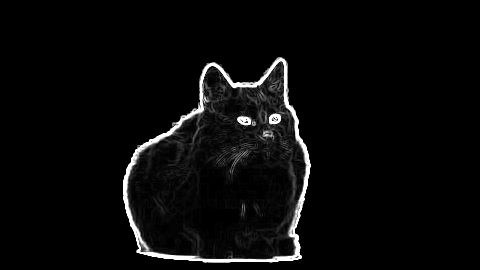

In [24]:
#Mostrar la imagen original y la imagen con brillo y contraste ajustados
cv2_imshow(img)
cv2_imshow(imagen_sobel)